# Notebook for Modeling Passing Data from ProFootballReference

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get current directory
import os

# Set working directory
os.chdir('C:\\Users\\Jack\\Documents\\GitHub\\FFInsights\\data')

In [205]:
# Load data
singles = pd.read_csv('pass_singles.csv')
twins = pd.read_csv('pass_twins.csv')
triplets = pd.read_csv('pass_triplets.csv')

In [206]:
# Print Lengths of DataFrames
print('Singles:', len(singles))
print('Twins:', len(twins))
print('Triplets:', len(triplets))

Singles: 600
Twins: 414
Triplets: 287


In [252]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
# Clean data
df = singles.drop(columns=['Player', 'Year'])
df = df.dropna()
# Prepare data
X1 = df.drop('FntsyPnts_y', axis=1)
Y1 = df['FntsyPnts_y']
# Scale data
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
# Define model
rf1 = RandomForestRegressor(n_estimators=200, 
                           criterion='squared_error', max_depth=None, 
                           min_samples_split=2, min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, max_features='auto', 
                           max_leaf_nodes=None, min_impurity_decrease=0.0, 
                           bootstrap=True, oob_score=False, 
                           n_jobs=None, random_state=None, 
                           verbose=0, warm_start=False)
# Perform cross-validation
scores1 = cross_val_score(rf1, X1, Y1, cv=10, scoring='neg_mean_squared_error')
# Fit model
rf1.fit(X1, Y1)
# Metrics
print('Mean Squared Error: ', np.mean(scores1))
print('Mean Absolute Error: ', mean_absolute_error(Y1, rf1.predict(X1)))
print('Explained Variance Score: ', explained_variance_score(Y1, rf1.predict(X1)))
print('R^2 Score: ', r2_score(Y1, rf1.predict(X1)))

Mean Squared Error:  -7638.002699327053
Mean Absolute Error:  25.812922222222255
Explained Variance Score:  0.9138383737137827
R^2 Score:  0.9138191019680587


In [250]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
# Clean data
df = twins.drop(columns=['Player', 'Year'])
df = df.dropna()
# Prepare data
X2 = df.drop('FntsyPnts_y', axis=1)
Y2 = df['FntsyPnts_y']
# Scale data
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)
# Define model
rf2 = RandomForestRegressor(n_estimators=200, 
                           criterion='squared_error', max_depth=None, 
                           min_samples_split=2, min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, max_features='auto', 
                           max_leaf_nodes=None, min_impurity_decrease=0.0, 
                           bootstrap=True, oob_score=False, 
                           n_jobs=None, random_state=None, 
                           verbose=0, warm_start=False)
# Perform cross-validation
scores2 = cross_val_score(rf2, X2, Y2, cv=10, scoring='neg_mean_squared_error')
# Fit model
rf2.fit(X2, Y2)
# Metrics
print('Mean Squared Error: ', np.mean(scores2))
print('Mean Absolute Error: ', mean_absolute_error(Y2, rf2.predict(X2)))
print('Explained Variance Score: ', explained_variance_score(Y2, rf2.predict(X2)))
print('R^2 Score: ', r2_score(Y2, rf2.predict(X2)))

Mean Squared Error:  -6357.603231267578
Mean Absolute Error:  23.233958188153373
Explained Variance Score:  0.9292117352156897
R^2 Score:  0.9292115362827803


In [251]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
# Clean data
df = triplets.drop(columns=['Player', 'Year'])
df = df.dropna()
# Prepare data
X3 = df.drop('FntsyPnts_y', axis=1)
Y3 = df['FntsyPnts_y']
# Scale data
scaler = StandardScaler()
X3 = scaler.fit_transform(X3)
# Define model
rf3 = RandomForestRegressor(n_estimators=200, 
                           criterion='squared_error', max_depth=None, 
                           min_samples_split=2, min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, max_features='auto', 
                           max_leaf_nodes=None, min_impurity_decrease=0.0, 
                           bootstrap=True, oob_score=False, 
                           n_jobs=None, random_state=None, 
                           verbose=0, warm_start=False)
# Perform cross-validation
scores3 = cross_val_score(rf3, X3, Y3, cv=10, scoring='neg_mean_squared_error')
# Fit model
rf3.fit(X3, Y3)
# Metrics
print('Mean Squared Error: ', np.mean(scores3))
print('Mean Absolute Error: ', mean_absolute_error(Y3, rf3.predict(X3)))
print('Explained Variance Score: ', explained_variance_score(Y3, rf3.predict(X3)))
print('R^2 Score: ', r2_score(Y3, rf3.predict(X3)))

Mean Squared Error:  -6448.945989122201
Mean Absolute Error:  23.886040099009985
Explained Variance Score:  0.9182169290503799
R^2 Score:  0.9181761764777038


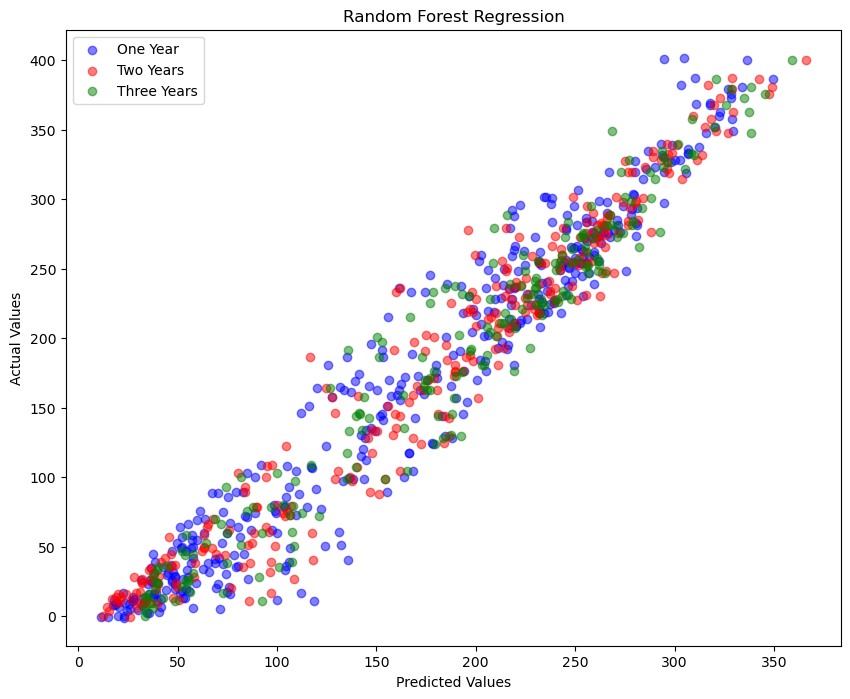

In [273]:
# Plot the three predictions against the actual values
plt.figure(figsize=(10, 8))
plt.scatter(rf1.predict(X1), Y1, color='blue', label='One Year', alpha=0.5)
plt.scatter(rf2.predict(X2), Y2, color='red', label='Two Years', alpha=0.5)
plt.scatter(rf3.predict(X3), Y3, color='green', label='Three Years', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

In [260]:
# Select 2023 data 
df1 = pd.read_csv('2023_nfl_passing_profootballreference_pred.csv')

# Use model to predict 2023 fantasy points
X = df1.drop(columns=['Player'])
X = scaler.transform(X)
df1['One_Year'] = rf1.predict(X)
df1 = df1[['Player', 'One_Year']].sort_values(by='One_Year', ascending=False)

In [261]:
# Select prior two years of data 
df2 = pd.read_csv('2022_2023_nfl_passing_profootballreference_pred.csv')

# Use model to predict 2023 fantasy points
X = df2.drop(columns=['Player'])
X = scaler.transform(X)
df2['Two_Years'] = rf2.predict(X)
df2 = df2[['Player', 'Two_Years']].sort_values(by='Two_Years', ascending=False)

In [262]:
# Select prior three years of data
df3 = pd.read_csv('2021_2022_2023_nfl_passing_profootballreference_pred.csv')

# Use model to predict 2023 fantasy points
X = df3.drop(columns=['Player'])
X = scaler.transform(X)
df3['Three_Years'] = rf3.predict(X)
df3 = df3[['Player', 'Three_Years']].sort_values(by='Three_Years', ascending=False)

In [269]:
# Merge df1, df2, df3 by 'Player' while including Nan values
df = pd.merge(df1, df2, on='Player', how='outer')
df = pd.merge(df, df3, on='Player', how='outer')

# Calculate average of the three predictions
df['Average'] = df.mean(axis=1)
df['VOLS'] = df['Average'] - df['Average'].nlargest(12).min()
df = df.sort_values(by='Average', ascending=False)
df.head(24).round(2)

C:\Users\Jack\AppData\Local\Temp\ipykernel_5892\1093628421.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Average'] = df.mean(axis=1)


,Player,One_Year,Two_Years,Three_Years,Average,VOLS
0,Josh Allen,302.29,294.81,324.31,307.14,83.14
1,Jalen Hurts,299.90,299.85,289.24,296.33,72.33
3,C.J. Stroud,278.81,NaN,NaN,278.81,54.82
7,Patrick Mahomes,245.66,279.84,289.02,271.51,47.51
2,Lamar Jackson,283.61,244.13,257.95,261.90,37.90
4,Jordan Love,260.52,NaN,NaN,260.52,36.52
5,Dak Prescott,250.27,256.44,256.57,254.43,30.43
6,Jared Goff,248.91,246.18,260.38,251.82,27.82
11,Tua Tagovailoa,230.47,242.13,244.62,239.07,15.07
8,Matthew Stafford,244.17,219.22,243.08,235.49,11.49
